# Visualización del Dataset FER2013
Este notebook carga, transforma y visualiza el dataset FER2013.


In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Transformaciones
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((48,48)),
    transforms.ToTensor()
])

# Directorios del dataset
train_dir = 'train'
test_dir = 'test'

# Dataset
train_set = datasets.ImageFolder(root=train_dir, transform=transform)
test_set = datasets.ImageFolder(root=test_dir, transform=transform)

# DataLoaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

print("Clases:", train_set.classes)
print("Total imágenes train:", len(train_set))
print("Total imágenes test:", len(test_set))


Clases: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Total imágenes train: 28709
Total imágenes test: 7178


## Visualización de algunas imágenes del dataset


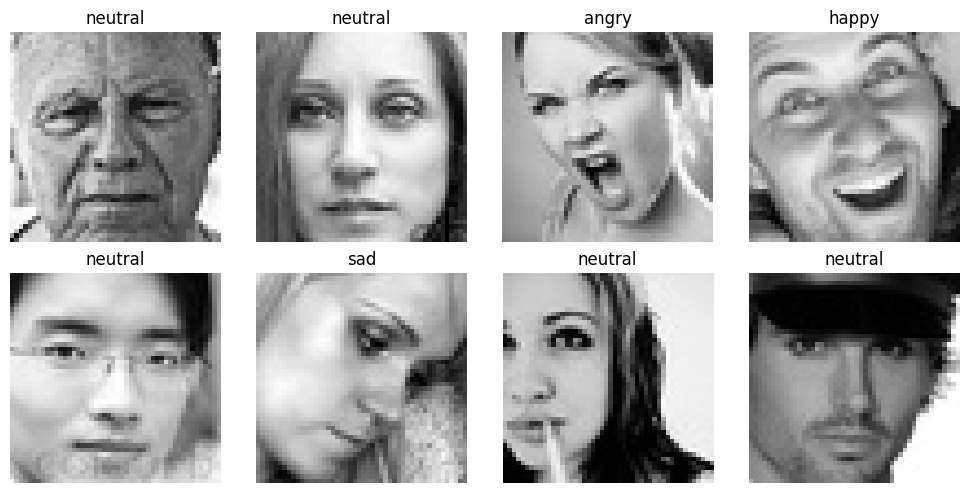

In [2]:
images, labels = next(iter(train_loader))

fig, axs = plt.subplots(2, 4, figsize=(10,5))
axs = axs.flatten()

for i in range(8):
    img = images[i].permute(1,2,0).squeeze()
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(train_set.classes[labels[i]])
    axs[i].axis('off')

plt.tight_layout()
plt.show()


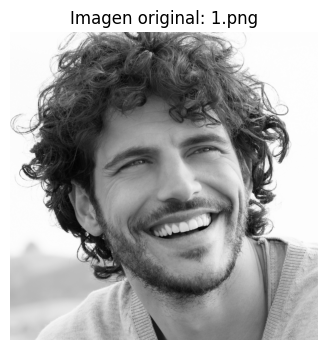

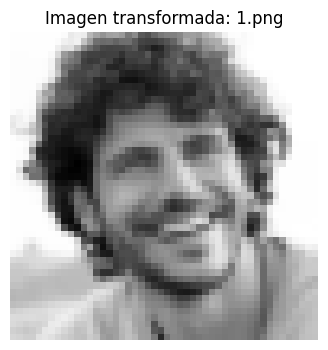

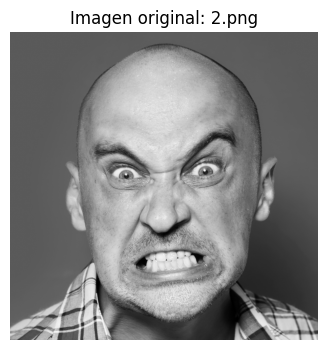

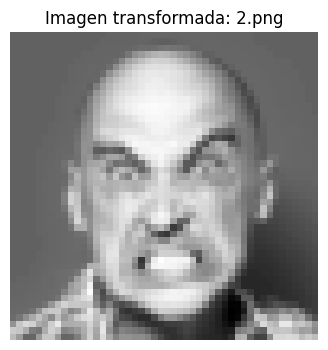

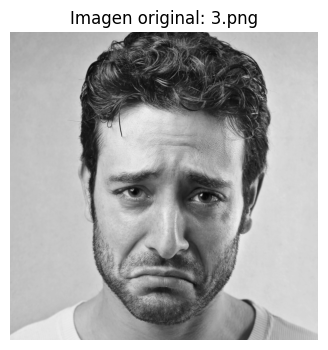

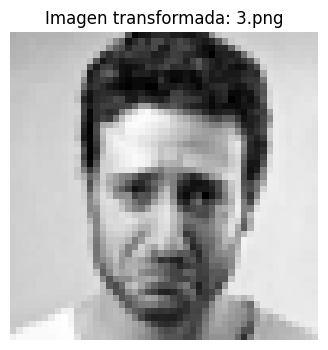

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T

# Carpeta donde pusiste tus imágenes externas
folder = "fotos_externas"

# Transformaciones (las mismas que usas para FER2013)
transform = T.Compose([
    T.Resize((48,48)),
    T.ToTensor(),
])

# Recorrer todas las imágenes de la carpeta
for img_name in os.listdir(folder):
    path = os.path.join(folder, img_name)

    # Cargar imagen original
    img = Image.open(path).convert("L")  # Escala de grises

    # Mostrar imagen original
    plt.figure(figsize=(4,4))
    plt.imshow(img, cmap="gray")
    plt.title(f"Imagen original: {img_name}")
    plt.axis("off")
    plt.show()

    # Aplicar transformaciones
    img_transformed = transform(img)

    # Mostrar imagen transformada
    plt.figure(figsize=(4,4))
    plt.imshow(img_transformed.squeeze(), cmap="gray")
    plt.title(f"Imagen transformada: {img_name}")
    plt.axis("off")
    plt.show()




In [4]:
import os
import shutil
import random

DATASET_PATH = "train"
TEST_PATH = "test"

OUTPUT_PATH = "data"
TRAIN_OUT = os.path.join(OUTPUT_PATH, "train")
VAL_OUT = os.path.join(OUTPUT_PATH, "val")
TEST_OUT = os.path.join(OUTPUT_PATH, "test")

VAL_SPLIT = 0.2  # 20% validación

def create_dirs():
    for path in [TRAIN_OUT, VAL_OUT, TEST_OUT]:
        if not os.path.exists(path):
            os.makedirs(path)
        for emotion in os.listdir(DATASET_PATH):
            emotion_path = os.path.join(path, emotion)
            if not os.path.exists(emotion_path):
                os.makedirs(emotion_path)

def split_train_val():
    print("Creando split train/val...")

    for emotion in os.listdir(DATASET_PATH):
        emotion_path = os.path.join(DATASET_PATH, emotion)
        images = os.listdir(emotion_path)
        random.shuffle(images)

        val_size = int(len(images) * VAL_SPLIT)

        val_imgs = images[:val_size]
        train_imgs = images[val_size:]

        # Copiar train
        for img in train_imgs:
            shutil.copy(
                os.path.join(emotion_path, img),
                os.path.join(TRAIN_OUT, emotion, img)
            )

        # Copiar val
        for img in val_imgs:
            shutil.copy(
                os.path.join(emotion_path, img),
                os.path.join(VAL_OUT, emotion, img)
            )

def copy_test():
    print("Copiando test...")

    for emotion in os.listdir(TEST_PATH):
        emotion_path = os.path.join(TEST_PATH, emotion)
        for img in os.listdir(emotion_path):
            shutil.copy(
                os.path.join(emotion_path, img),
                os.path.join(TEST_OUT, emotion, img)
            )

def main():
    create_dirs()
    split_train_val()
    copy_test()
    print("¡Split completado!")

main()


Creando split train/val...
Copiando test...
¡Split completado!


In [7]:
import os

splits = ["data/train", "data/val", "data/test"]

for split in splits:
    total = 0
    print(f"\nConteo en: {split}")
    for cls in os.listdir(split):
        cls_path = os.path.join(split, cls)
        count = len(os.listdir(cls_path))
        total += count
        print(f"  {cls}: {count} imágenes")
    print(f"TOTAL {split}: {total} imágenes")



Conteo en: data/train
  angry: 3196 imágenes
  disgust: 349 imágenes
  fear: 3278 imágenes
  happy: 5772 imágenes
  neutral: 3972 imágenes
  sad: 3864 imágenes
  surprise: 2537 imágenes
TOTAL data/train: 22968 imágenes

Conteo en: data/val
  angry: 799 imágenes
  disgust: 87 imágenes
  fear: 819 imágenes
  happy: 1443 imágenes
  neutral: 993 imágenes
  sad: 966 imágenes
  surprise: 634 imágenes
TOTAL data/val: 5741 imágenes

Conteo en: data/test
  angry: 958 imágenes
  disgust: 111 imágenes
  fear: 1024 imágenes
  happy: 1774 imágenes
  neutral: 1233 imágenes
  sad: 1247 imágenes
  surprise: 831 imágenes
TOTAL data/test: 7178 imágenes
